In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv
%matplotlib inline

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm


from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, matthews_corrcoef, cohen_kappa_score
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import (geometric_mean_score,
                              make_index_balanced_accuracy)


# read the csv file 
df = pd.read_csv('studentInfo.csv')

/Applications/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# convert data in the original dataset from categorical to numerical (it is easier to analyse)
df_encoded = pd.get_dummies(df, columns=['age_band','gender','disability', 'highest_education','imd_band','region', 'final_result'], drop_first=True)
df_encoded.columns

Index(['code_module', 'code_presentation', 'id_student',
       'num_of_prev_attempts', 'studied_credits', 'age_band_35-55',
       'age_band_55<=', 'gender_M', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn'],
      dtype='object')

In [3]:
# Seperate target labels
results = df_encoded['final_result_Withdrawn']

features = df_encoded.drop(['code_module', 'code_presentation', 'id_student',
        'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn'], axis=1)

# Get some specifics on our dataset
print("Data consists of {} instances of data with {} total columns with value counts of \n{}".format(
    features.shape[0], features.shape[1], results.value_counts()))
print("where 1 indicated Withdrawn")

Data consists of 32593 instances of data with 31 total columns with value counts of 
0    22437
1    10156
Name: final_result_Withdrawn, dtype: int64
where 1 indicated Withdrawn


In [4]:
# use SMOTE for oversampling 
oversampler = SMOTE()
os_features, os_results = oversampler.fit_sample(features, results)

RANDOM_STATE = 42

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(os_features, os_results, test_size = .3, random_state=0)

Training
____________________
Predicting
[1 0 0 ..., 0 1 0]
class probabilities: [[ 0.34251493  0.65748507]
 [ 0.62435822  0.37564178]
 [ 0.57354961  0.42645039]
 ..., 
 [ 0.54806316  0.45193684]
 [ 0.29552028  0.70447972]
 [ 0.58856438  0.41143562]]


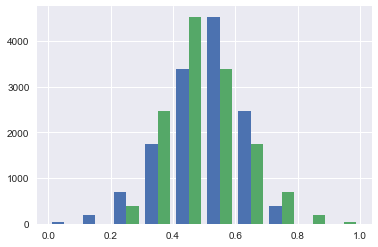

____________________
Evaluating
Using 10-fold cross-validation
cross validation scores: [ 0.61330363  0.59261617  0.61171229  0.59707193  0.59758039  0.60362942
  0.59121299  0.60764331  0.59426752  0.59968153]
mean score: 0.600871916216
____________________
generating metrics
accurancy score: 0.602763128575
roc score: 0.642773004445
f1 score: 0.581991558543
classification report:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.59      0.65      0.55      0.62      0.60      0.36      6733
          1       0.61      0.55      0.65      0.58      0.60      0.37      6730

avg / total       0.60      0.60      0.60      0.60      0.60      0.36     13463

confusion matrix
[[4392 2341]
 [3007 3723]]
Mathews Correlation 0.206522022969
Cohens kappa 0.205508701861
The geometric mean is 0.60071135938347
plotting ROC curve


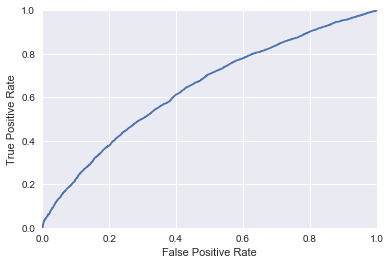

Done


In [5]:

print('Training')
model2 = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            LogisticRegression(class_weight="balanced"))
model2.fit(X_train, y_train)

print(20*'_')
# predict class labels for the test set
print('Predicting')
predicted = model2.predict(X_test)
print(predicted)

# generate class probabilities
probs = model2.predict_proba(X_test)
print('class probabilities:',probs)
plt.hist(probs) 
plt.show()

print(20*'_')
# evaluate the model using 10-fold cross-validation
print('Evaluating')
print('Using 10-fold cross-validation')
scores = cross_val_score(LogisticRegression(class_weight="balanced"), X_train, y_train, scoring='accuracy', cv=10)
print('cross validation scores:',scores)
print('mean score:',scores.mean())

print(20*'_')
# generate evaluation metrics
print('generating metrics')
print('accurancy score:',metrics.accuracy_score(y_test, predicted))
print('roc score:',metrics.roc_auc_score(y_test, probs[:, 1]))
print('f1 score:',metrics.f1_score(y_test, predicted))
print('classification report:')
print(classification_report_imbalanced(y_test, predicted))
print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))
print('Mathews Correlation',matthews_corrcoef(y_test, predicted)) 
print('Cohens kappa', cohen_kappa_score(y_test, predicted))


print('The geometric mean is {}'.format(geometric_mean_score(
    y_test,
    predicted)))


# plot ROC curve 
print('plotting ROC curve')
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1]) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

print('Done')

In [ ]:
# Try Random Forest classifier classifiers 
print("For Random Forest Classifier:")


rf = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            RandomForestClassifier(class_weight="balanced"))



rfscores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=10)
print(rfscores, rfscores.mean())

# Train the classifier with balancing
rf.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_rf = rf.predict(X_test)
print('The geometric mean is {}'.format(geometric_mean_score(
    y_test,
    y_pred_rf)))


# Show the classification report
print(metrics.confusion_matrix(y_test, y_pred_rf))
print(classification_report_imbalanced(y_test, y_pred_rf))
print('Mathews Correlation',matthews_corrcoef(y_test, y_pred_rf)) 

For Random Forest Classifier:
[ 0.67918523  0.66295353  0.68204965  0.67281986  0.6663483   0.6864056
  0.669532    0.68312102  0.67898089  0.68089172] 0.676228780177
The geometric mean is 0.6754688924891321
[[4731 2002]
 [2360 4370]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.70      0.65      0.68      0.68      0.46      6733
          1       0.69      0.65      0.70      0.67      0.68      0.46      6730

avg / total       0.68      0.68      0.68      0.68      0.68      0.46     13463

Mathews Correlation 0.352492933173


In [ ]:
knn = KNeighborsClassifier()
print("For K-Nearest Neighbors Classifier:")
knnscores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
print(knnscores, knnscores.mean())

# Train the classifier with balancing
knn.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_knn = knn.predict(X_test)
print('The geometric mean is {}'.format(geometric_mean_score(
    y_test,
    y_pred_knn)))

# Show the classification report
print(metrics.confusion_matrix(y_test, y_pred_knn))
print(classification_report_imbalanced(y_test, y_pred_knn))
print('Mathews Correlation',matthews_corrcoef(y_test, y_pred_knn)) 


For K-Nearest Neighbors Classifier:
[ 0.63940165  0.62667091  0.63558243  0.63017187  0.62559694  0.62973575
  0.61954791  0.62484076  0.60636943  0.64522293] 0.628314059416
